In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_segmentation=pd.read_csv('segmentation data.csv',index_col=0)

In [3]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [5]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


Correlation Estimate

In [6]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


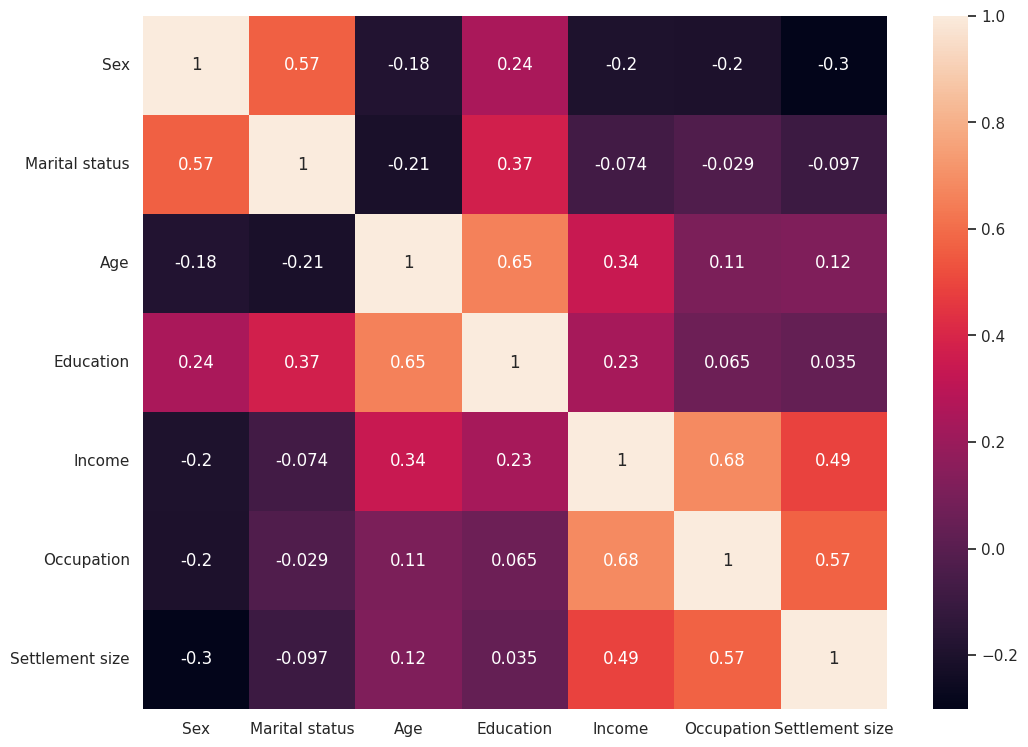

In [7]:
plt.figure(figsize=(12,9))
sns.heatmap(df_segmentation.corr(),annot=True)
plt.show()

Visulaize Data

<Figure size 1200x900 with 0 Axes>

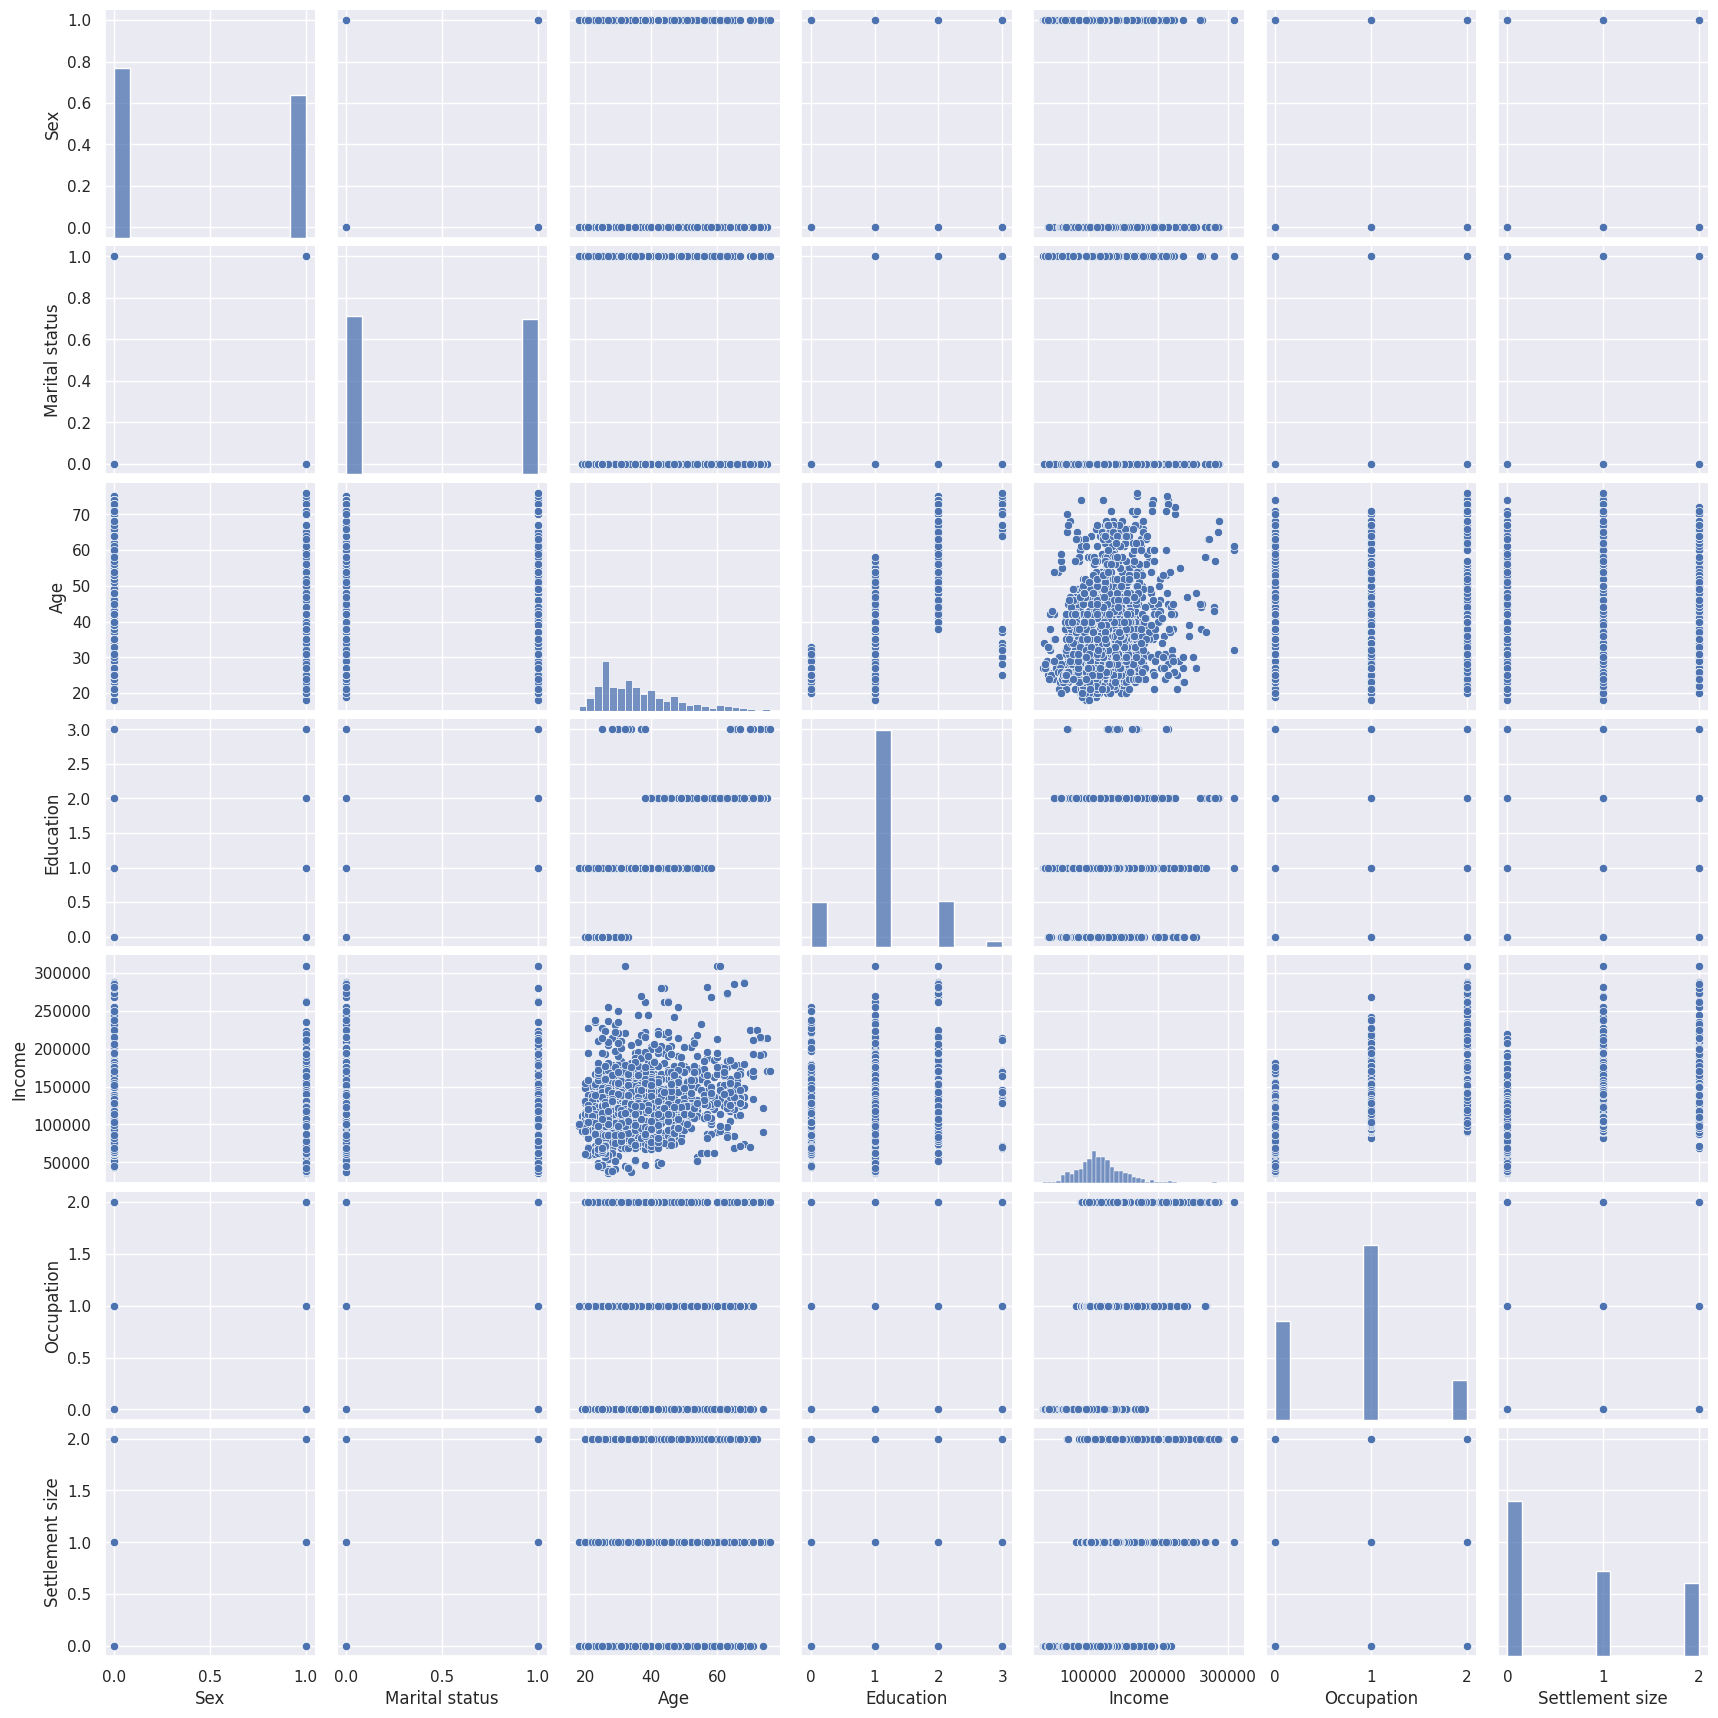

In [8]:
plt.figure(figsize=(12,9))
sns.pairplot(df_segmentation)
plt.show()

Preprocessing

Standardization

In [9]:
scaler=StandardScaler()
segmentation_std=scaler.fit_transform(df_segmentation)

hierarchial clustering

In [10]:
hier_cluster=linkage(segmentation_std,method='ward')

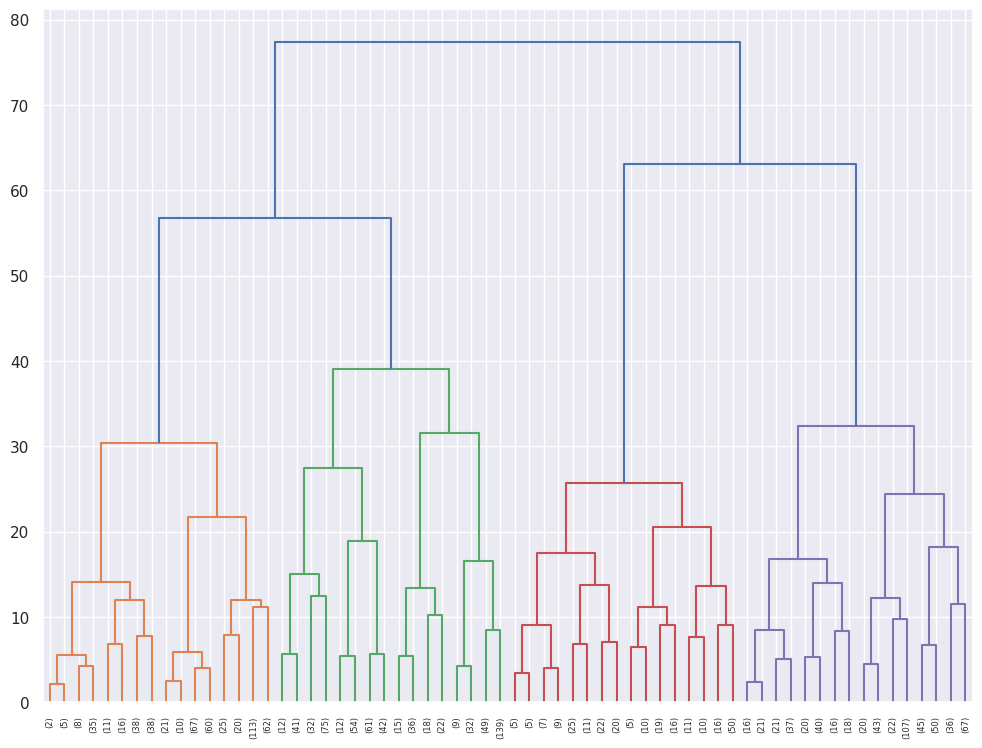

In [11]:
plt.figure(figsize=(12,9))
dendrogram(hier_cluster,truncate_mode='level',p=5,show_leaf_counts=True,no_labels=False)
plt.show()

K Means Clustering

1. choose number of clusters
2. specify cluster seed(starting centroid)
3.Calculate the centroid or the geometrical center
issues
senstive to outliers solved by k median clustering
choose nukmber of clusters
if k is too small ,centroid will not lie in cluster
if k is too large,some of the clusters may be split into two.
k means enforces spherical clusters

K means Clustering

In [12]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(segmentation_std)
  wcss.append(kmeans.inertia_)

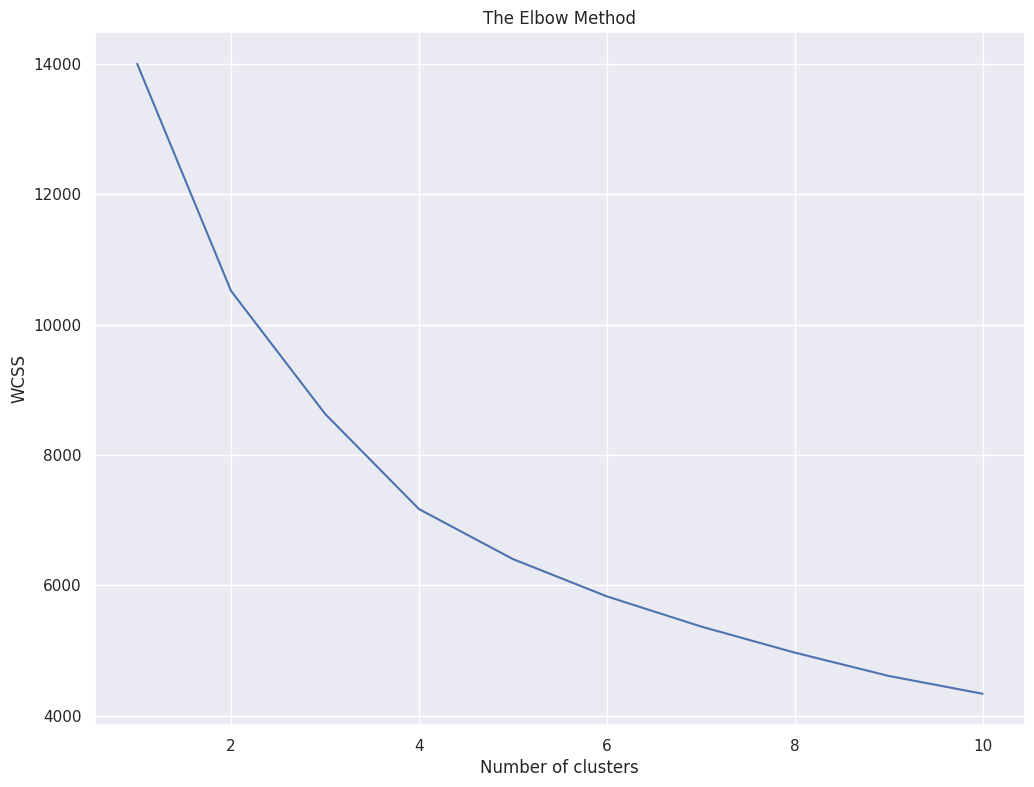

In [13]:
plt.figure(figsize=(12,9))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

Results

In [15]:
df_segmentation_kmeans=df_segmentation.copy()
df_segmentation_kmeans['Segment K-means']=kmeans.labels_

In [16]:
df_segm_analysis=df_segmentation_kmeans.groupby(['Segment K-means'])
df_segm_analysis

in'group by' we need to include a second argument (column),in order to count each row in the table.You can choose an arbitrary column, we select'Sex'

In [17]:
df_segm_analysis['N Obs']=df_segmentation_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()

TypeError: 'DataFrameGroupBy' object does not support item assignment

In [ ]:
df_segm_analysis['Prop Obs']=df_segm_analysis['N Obs']/df_segm_analysis['N Obs'].sum()

In [ ]:
df_segm_analysis.rename({0:'well-off',1:'fewer opportunities',2:'Standard',3:'Career focused'})

plot raw data

In [18]:
df_segm_kmeans['Labels']=df_segmentation_kmeans['Segment K-means'].map({0:'well-off',1:'fewer opportunities',2:'Standard',3:'Career focused'})

NameError: name 'df_segm_kmeans' is not defined

In [19]:
x_axis=df_segm_kmeans['Age']
y_axis=df_segm_kmeans['Income']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Labels'],palette=['g','r','c','m'])
plt.title('Segmentation K-means')
plt.show()

NameError: name 'df_segm_kmeans' is not defined

PCA

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca=PCA()

In [24]:
pca.fit(segmentation_std)

PCA()

In [25]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

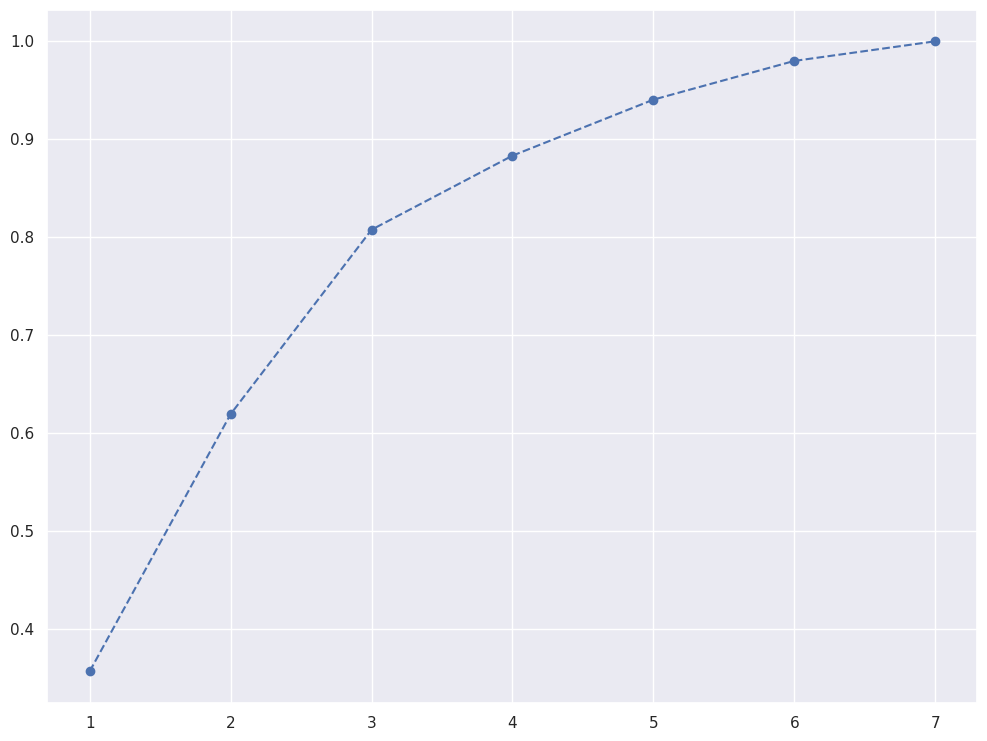

In [26]:
plt.figure(figsize=(12,9))
plt.plot([1,2,3,4,5,6,7],pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')

In [27]:
pca=PCA(n_components=3)

In [28]:
pca.fit(segmentation_std)

PCA(n_components=3)

PCA Results

In [29]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [30]:
df_pca_comp=pd.DataFrame(pca.components_,columns=df_segmentation.columns,index=['PC-1','PC-2','PC-3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
PC-1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
PC-2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
PC-3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


<Axes: >

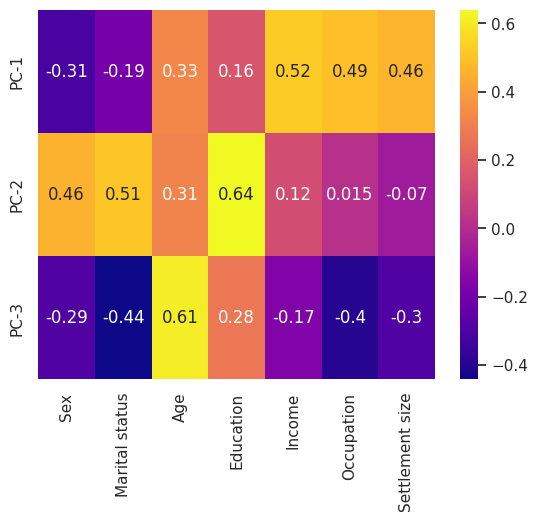

In [31]:
sns.heatmap(df_pca_comp,annot=True,cmap='plasma')

In [32]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [33]:
scores_pca=pca.transform(segmentation_std)

K-Means Clustering with PCA

Note:- Kmeans scores are standardize by definition

In [34]:
wcss=[]
for i in range(1,11):
  kmeans_pca=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

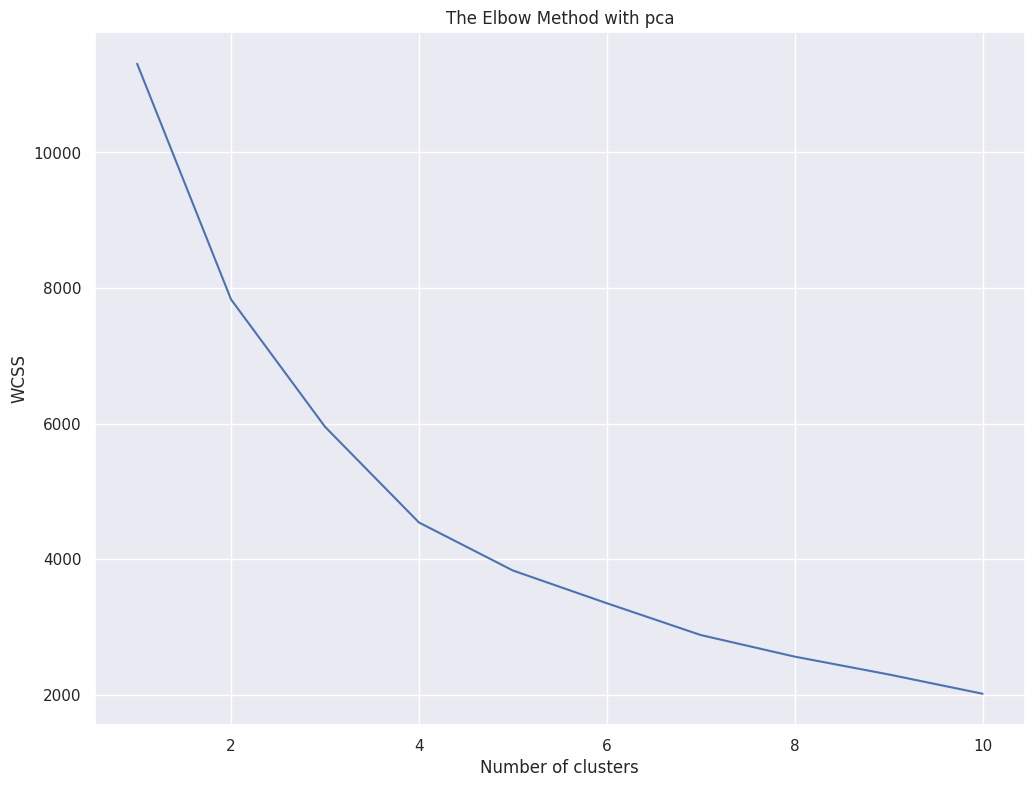

In [35]:
plt.figure(figsize=(12,9))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method with pca')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
kmeans_pca=KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

kmeans clustering with pca results

In [37]:
df_segm_pca_kmeans=pd.concat([df_segmentation.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_segm_pca_kmeans.columns.values[-3:]=['PC-1','PC-2','PC-3']
df_segm_pca_kmeans['Segment K-means PCA']=kmeans_pca.labels_

In [38]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,PC-1,PC-2,PC-3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,2
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,3
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,3
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,3
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


In [39]:
df_segm_pca_kmeans_freq=df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,PC-1,PC-2,PC-3
Segment K-means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039
3,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644


component 1= Career
component 2= Education Lifestyle
component 3= Experience

In [41]:
df_segm_pca_kmeans_freq['N Obs']=df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs']=df_segm_pca_kmeans_freq['N Obs']/df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq=df_segm_pca_kmeans_freq.rename({0:'well-off',1:'fewer opportunities',2:'Standard',3:'Career focused'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,PC-1,PC-2,PC-3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
well-off,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,NaN,NaN
fewer opportunities,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,NaN,NaN
Standard,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,NaN,NaN
Career focused,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,NaN,NaN


determine most important components

In [42]:
df_segm_pca_kmeans['Legend']=df_segm_pca_kmeans['Segment K-means PCA'].map({0:'well-off',1:'fewer opportunities',2:'Standard',3:'Career focused'})

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


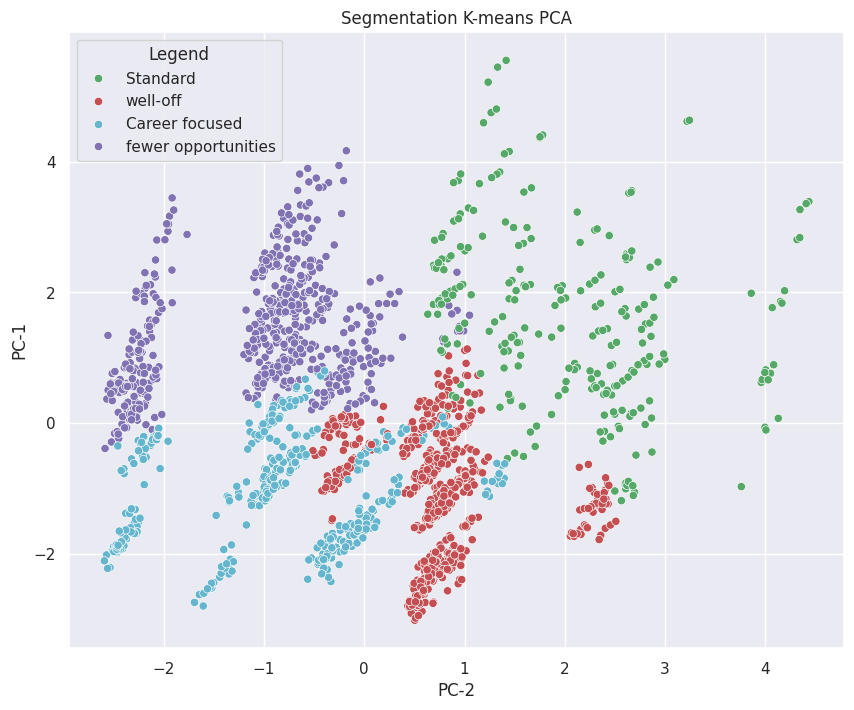

In [44]:
!pip install seaborn --upgrade # upgrade seaborn to the latest version

import seaborn as sns
import matplotlib.pyplot as plt

x_axis=df_segm_pca_kmeans['PC-2']
y_axis=df_segm_pca_kmeans['PC-1']
plt.figure(figsize=(10,8))

# Pass the DataFrame and column names as arguments
sns.scatterplot(x='PC-2', y='PC-1', hue='Legend', data=df_segm_pca_kmeans, palette=['g','r','c','m'])

plt.title('Segmentation K-means PCA')
plt.show()

Data Export

In [45]:
import pickle

In [46]:
pickle.dump(scaler,open('scaler.pickle','wb'))
pickle.dump(pca,open('pca.pickle','wb'))
pickle.dump(kmeans_pca,open('kmeans_pca.pickle','wb'))

Positioning

Purchasing Analytics

In [47]:
df_purchase=pd.read_csv('purchase data.csv')

In [48]:
df_purchase.isnull().sum()

,0
ID,0
Day,0
Incidence,0
Brand,0
Quantity,0
Last_Inc_Brand,0
Last_Inc_Quantity,0
Price_1,0
Price_2,0
Price_3,0


how similar are customers to each other

import segmentation model

In [49]:
scaler=pickle.load(open('scaler.pickle','rb'))
pca=pickle.load(open('pca.pickle','rb'))
kmeans_pca=pickle.load(open('kmeans_pca.pickle','rb'))

Standardization

In [50]:
features=df_purchase[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]

In [51]:
df_purchase_segm_std=scaler.transform(features)

PCA

In [52]:
df_purchase_segm_pca=pca.transform(df_purchase_segm_std)

Kmeans PCA

In [53]:
purchase_segm_kmeans_pca=kmeans_pca.predict(df_purchase_segm_pca)

In [54]:
df_purchase_predictors=df_purchase.copy()

In [55]:
df_purchase_predictors['Segment']=purchase_segm_kmeans_pca

Descriptive analysis by Segments

Data Analysis by Customer

In [56]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,3
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,3
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,3
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,3
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,3


create dataframe with one record per individual

In [57]:
temp1=df_purchase_predictors[['ID','Incidence']].groupby(['ID'],as_index=False).count()

In [58]:
temp1=temp1.set_index('ID')
temp1=temp1.rename(columns={'Incidence':'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [59]:
temp2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence': 'N_Purchases'})
temp3 = temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [60]:
temp3['Average_N_Purchases'] = temp3['N_Purchases'] / temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [61]:
temp4 = df_purchase_predictors[['ID', 'Segment']].groupby(['ID'], as_index = False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)

In [62]:
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,3.0
200000002,87,11,0.126437,2.0
200000003,97,10,0.103093,3.0
200000004,85,11,0.129412,3.0
200000005,111,13,0.117117,1.0


Segment Proportions

In [63]:
segm_prop = df_purchase_descr[['N_Purchases', 'Segment']].groupby(['Segment']).count() / df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns = {'N_Purchases': 'Segment Proportions'})
segm_prop.head()

,Segment Proportions
Segment,
0.0,0.206
1.0,0.220
2.0,0.196
3.0,0.378


Text(0.5, 1.0, 'Segment Proportions')

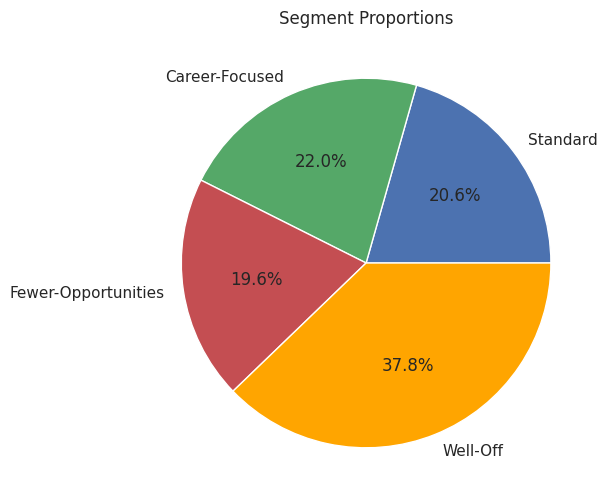

In [64]:
plt.figure(figsize = (9, 6))
plt.pie(segm_prop['Segment Proportions'],
        labels = ['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'],
        autopct = '%1.1f%%',
        colors = ('b', 'g', 'r', 'orange'))
plt.title('Segment Proportions')

Purchase Occurence and Purchase Incidence

In [65]:
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,N_Visits,N_Purchases,Average_N_Purchases
Segment,,,
0.0,117.699029,24.902913,0.212773
1.0,123.454545,39.827273,0.283102
2.0,117.295918,34.602041,0.284478
3.0,113.730159,22.756614,0.201588


In [66]:
segments_std = df_purchase_descr.groupby(['Segment']).std()

Text(0.5, 1.0, 'Average Number of Store Visits by Segment')

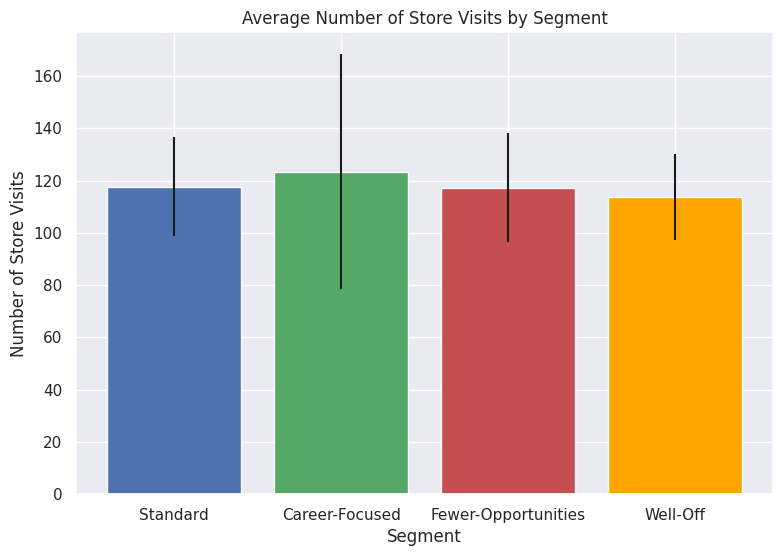

In [67]:
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'),
        height = segments_mean['N_Visits'],
        yerr = segments_std['N_Visits'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment')

Text(0.5, 1.0, 'Number of Purchases by Segment')

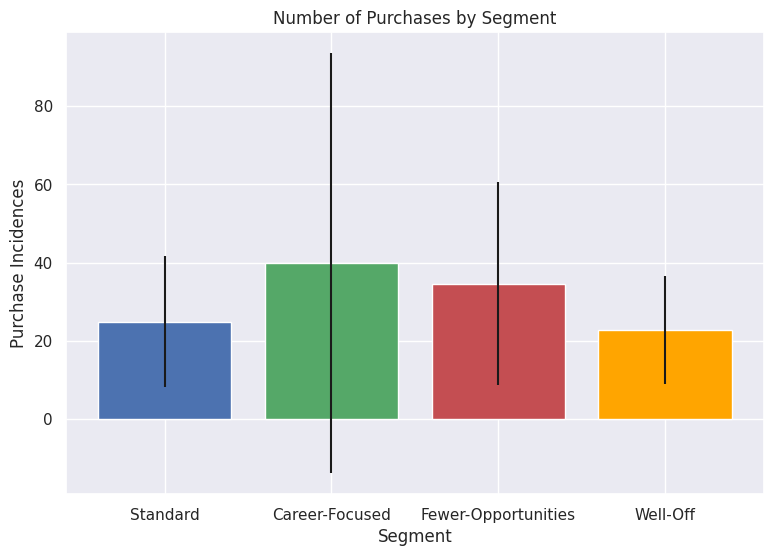

In [68]:
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'),
        height = segments_mean['N_Purchases'],
        yerr = segments_std['N_Purchases'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Number of Purchases by Segment')

Text(0.5, 1.0, 'Average Number of Purchases by Segment')

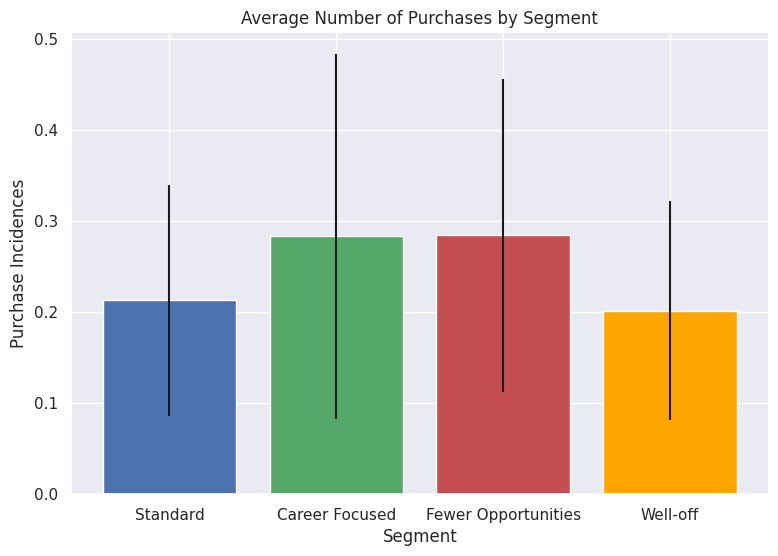

In [69]:
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard','Career Focused','Fewer Opportunities','Well-off'),
        height = segments_mean['Average_N_Purchases'],
        yerr = segments_std['Average_N_Purchases'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Average Number of Purchases by Segment')

Brand Choice

In [70]:
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]

In [71]:
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidence['Segment'], df_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,False,True,False,False,False,3,200000001
11,False,False,False,False,True,3,200000001
19,True,False,False,False,False,3,200000001
24,False,False,False,True,False,3,200000001
29,False,True,False,False,False,3,200000001
...,...,...,...,...,...,...,...
58621,False,True,False,False,False,3,200000500
58648,True,False,False,False,False,3,200000500
58674,False,True,False,False,False,3,200000500
58687,False,True,False,False,False,3,200000500


In [72]:
temp = brand_dummies.groupby(['ID'], as_index = True).mean()

In [73]:
mean_brand_choice = temp.groupby(['Segment'], as_index = True).mean()

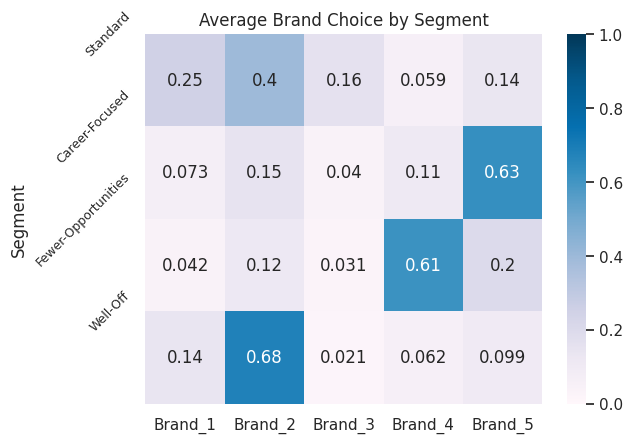

In [74]:
sns.heatmap(mean_brand_choice,
            vmin = 0,
            vmax = 1,
            cmap = 'PuBu',
            annot = True)
plt.yticks([0, 1, 2, 3], ['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'], rotation = 45, fontsize = 9)
plt.title('Average Brand Choice by Segment')
plt.show()

Revenue

In [75]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]
temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = temp[['Segment', 'Revenue Brand 1']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1
0,0,2611.19
1,1,736.09
2,2,699.47
3,3,2258.90


In [76]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']] = temp[['Segment', 'Revenue Brand 2']].groupby(['Segment'], as_index = False).sum()

In [77]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
temp.loc[:,'Revenue Brand 3'] = temp['Price_3']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 3']] = temp[['Revenue Brand 3','Segment']].groupby(['Segment'], as_index = False).sum()

In [78]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
temp.loc[:,'Revenue Brand 4'] = temp['Price_4']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 4']] = temp[['Revenue Brand 4','Segment']].groupby(['Segment'], as_index = False).sum()

In [79]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
temp.loc[:,'Revenue Brand 5'] = temp['Price_5']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 5']] = temp[['Revenue Brand 5','Segment']].groupby(['Segment'], as_index = False).sum()

In [80]:
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'] +
                                           segments_brand_revenue['Revenue Brand 2'] +
                                           segments_brand_revenue['Revenue Brand 3'] +
                                           segments_brand_revenue['Revenue Brand 4'] +
                                           segments_brand_revenue['Revenue Brand 5'] )
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
1,1,736.09,1746.42,664.75,2363.84,19441.06,24952.16
2,2,699.47,1298.23,731.35,14185.57,5509.69,22424.31
3,3,2258.90,13955.14,716.25,1629.31,2230.50,20790.10


In [81]:
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportions']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({0:'Standard',
                                                                           1:'Career-Focused',
                                                                           2:'Fewer-Opportunities',
                                                                           3:'Well-Off'})
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
Fewer-Opportunities,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196
Well-Off,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
